<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Session 5)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# to display the float values upto 4 decimal places     
pd.options.display.float_format = '{:.4f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# read the data
df_seed = pd.read_csv("seeds_dataset.csv")

# display the first five rows of the data
df_seed.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.7600,13.3800,5.0730,3.1550,4.8300,0
1,12.1300,13.7300,5.3940,3.7450,5.2200,0
2,14.8600,14.6700,5.6780,3.2580,5.3510,0
3,15.6900,14.7500,5.5270,3.5140,5.0460,0
4,19.9400,16.9200,6.6750,3.7630,6.5500,1


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Consider the train-test split in the ratio 70:30 with random state = 1.

#### Split the dependent and independent variables.

In [4]:
# split the target and independent variables
# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Type' using drop()
# 'axis = 1' drops the specified column
df_feature = df_seed.drop('Type', axis=1)

# store the target variable 'Type' in a dataframe 'df_target'
df_target = df_seed["Type"]

#### Split the data in train and test set.

In [5]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, random_state = 1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (139, 5)
y_train (139,)
X_test (60, 5)
y_test (60,)


#### Build a decision tree model on the train set using 'gini' criterion.

In [6]:
# instantiate the 'DecisionTreeClassifier' object using 'gini' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 1)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

#### Let us plot the confusion matrix. The sum of the diagonal elements in the matrix corresponds to the total correct predictions.

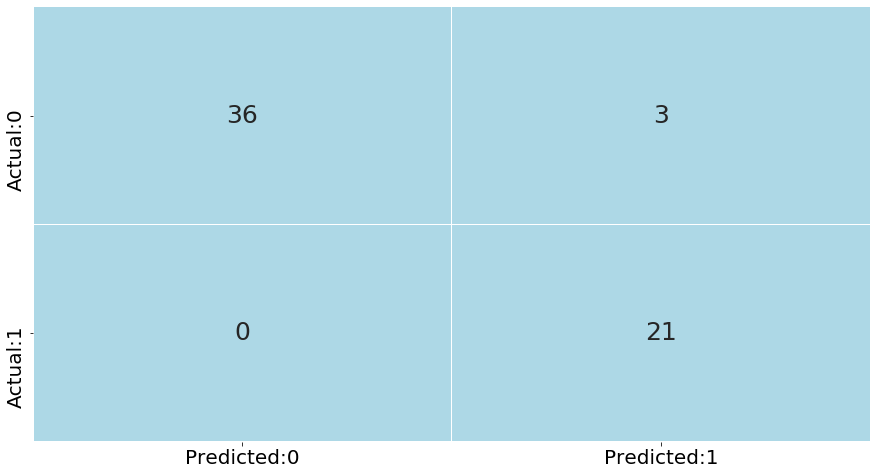

In [7]:
# predict the type for wheat seed for test set
y_pred = decision_tree.predict(X_test)

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Interpretation:** The confusion matrix shows that the decision tree has correctly predicted the type of 57 wheat seeds among the 60 observations in the test set.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot a decision tree for the model in the previous question and identify the seed type of the first observation in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

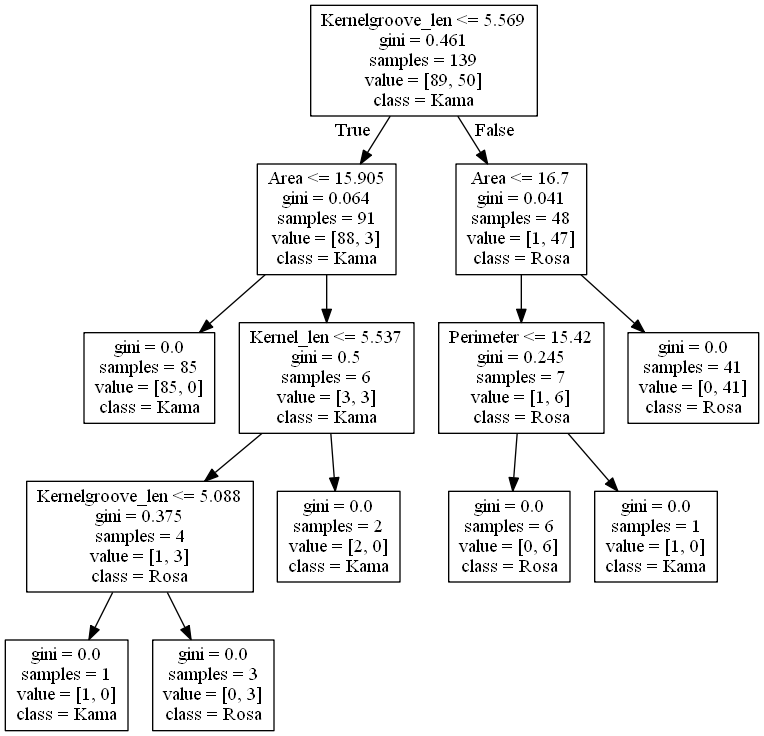

In [8]:
# plot a decision tree
# save the column names in 'labels'
labels = X_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(decision_tree, feature_names = labels, class_names = ["Kama","Rosa"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

Now let us find the seed type of the first observation in the test set.

In [9]:
# print the first observation in the test set using iloc()
X_test.iloc[0,:]

Area               17.0800
Perimeter          15.3800
Kernel_len          5.8320
Kernel_width        3.6830
Kernelgroove_len    5.4840
Name: 175, dtype: float64

**Interpretation:** The output shows that, `Kernelgroove_len = 5.4840` i.e. it satisfies the condition in the root node.<br>
Next, the `Area = 17.0800` which do not satisfy the condition of the internal node (Area <= 15.905).<br> 
Then, check the 'Kernel_len'. As, `Kernel_len = 5.8320`, it do not satisfy the condition of the internal node (Kernel_len <= 5.537).<br>
This leads to the leaf node which assigns the type of wheat seed as `Kama Wheat`.

In [10]:
# check the first observation in the y_test
y_test.iloc[0]

0

'0' indicates the `Kama wheat`.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Select the optimal number for decision trees from the given list of values to build a random forest using entropy criterion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

no_of_trees = [6, 8, 10, 12, 14, 16]

Consider the train and test set in Q1.

In [11]:
# given list of values
no_of_trees = [6, 8, 10, 12, 14, 16]

# create a dictionary with hyperparameter and its values
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
tuned_paramaters = [{'n_estimators': no_of_trees}]
 
# instantiate the 'RandomForestClassifier' with 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(criterion = 'entropy', random_state = 1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameter for random forest classifier: ', rf_model.best_params_, '\n')

Best parameter for random forest classifier:  {'n_estimators': 8} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the most important variable in the random forest build with the optimal number of trees obtained in Q3
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the train and test set in Q1.

First build the random forest with the `entropy` criterion and optimal number of trees (i.e. 8)

In [12]:
# instantiate the 'RandomForestClassifier' with 'entropy' criterion
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_grid_model = RandomForestClassifier(criterion = 'entropy', n_estimators = rf_model.best_params_.get('n_estimators'),
                                       random_state = 1)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid_model.fit(X_train, y_train)

Let us create a dataframe to identify the most important feature.

In [13]:
# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_grid_model.feature_importances_})

# print the dataframe
important_features

,Features,Importance
0,Area,0.3953
1,Perimeter,0.2147
2,Kernel_len,0.0295
3,Kernel_width,0.0189
4,Kernelgroove_len,0.3416


**Interpretation:** The above dataframe shows that the feature `Area` is of highest importance.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Which is the best criterion to build a decision tree for the given dataset?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the train and test set in Q1.

Let us use the GridSearchCV method to find the best criterion among the criteria `gini` and `entropy`.

In [14]:
# create a dictionary with hyperparameter and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
tuned_paramaters = [{'criterion': ['gini', 'entropy']}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
dt_grid = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameter for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameter for decision tree classifier:  {'criterion': 'entropy'} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a random forest containing ten trees and compute the precision and sensitivity of the model from the confusion matrix 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the train and test set in Q1.

In [15]:
# instantiate the 'RandomForestClassifier' 
# pass the number of decision trees to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 1)

# use fit() to fit the model on the train set
rf_model = rf_grid_model.fit(X_train, y_train)

# predict the type for wheat seed for test set
y_pred_rf = rf_model.predict(X_test)

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_rf)

# calculate the precision value
precision = cm[1,1] / (cm[1,1] + cm[0,1])

# print the precision value
print('Precision:', precision)

# calculate the sensitivity
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])

# print the sensitivity
print('Sensitivity:', sensitivity)

Precision: 0.9090909090909091
Sensitivity: 0.9523809523809523


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the optimal depth of the decision tree from the given list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth_values = [3, 5, 7, 9]

Consider the train and test set in Q1.

In [16]:
# consider the list of values for the hyperparameter 'max_depth' 
depth_values = [3, 5, 7, 9]

# create a dictionary with hyperparameter and its values
# pass the list of values to the parameter, 'max_depth' 
tuned_paramaters = [{'max_depth': depth_values}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
dt_grid = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameter for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameter for decision tree classifier:  {'max_depth': 5} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build and plot a decision tree with maximum 5 terminal nodes (use the entropy criterion)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the train and test set in Q1.

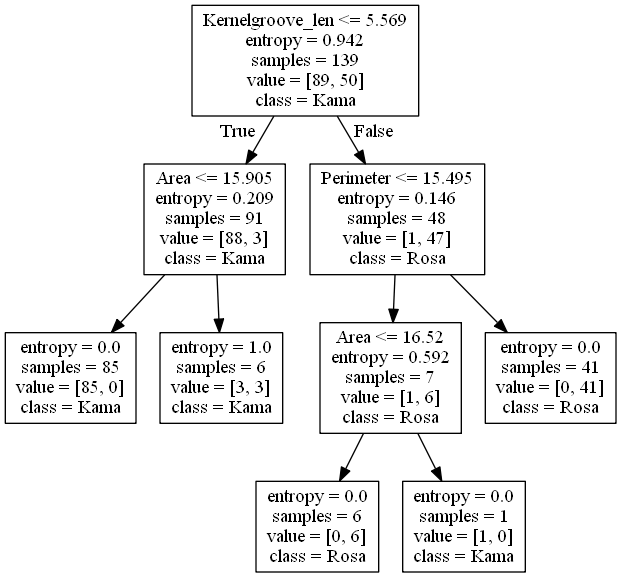

In [17]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# set 'max_leaf_nodes = 5' to build the tree with maximim 5 leaf/terminal nodes
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 5, random_state = 1)

# fit the model using fit() on train data
dt_model = decision_tree_classification.fit(X_train, y_train)

# plot a decision tree
# save the column names in 'labels'
labels = X_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["Kama","Rosa"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a random forest with entropy criterion such that each leaf node will contain at least three samples. Also calculate the f-1 score and accuracy of the model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# instantiate the 'RandomForestClassifier' using 'entropy' criterion
# 'min_samples_leaf' assigns the minimum number of samples required at the leaf/terminal node
# pass the 'random_state' to obtain the same samples for each time you run the code
rf = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 3, random_state = 1)

# use fit() to fit the model on the train set
rf_model = rf.fit(X_train, y_train)

# predict the type for wheat seed for test set
y_pred_rf = rf_model.predict(X_test)

# use the classification_report() to get the f-1 score and accuracy  
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.87      0.95      0.91        21

    accuracy                           0.93        60
   macro avg       0.92      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Plot a decision tree with the optimal criterion such that it will contain no more than 4 terminal nodes and each terminal node will contain at least 5 observations  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

From Q5, it can be concluded that the optimal criterion for the decision tree is `entropy`. 

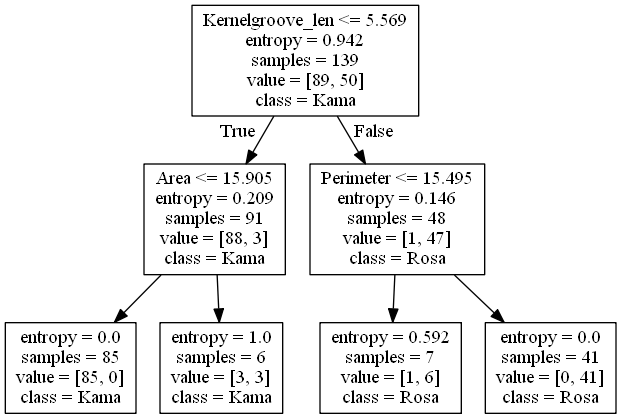

In [19]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# set 'max_leaf_nodes = 4' to build the tree with 4 maximum leaf/terminal nodes
# set 'min_samples_leaf = 5' that assigns the minimum number of samples required at the leaf/terminal node
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 4, min_samples_leaf = 5, random_state = 1)

# fit the model using fit() on train data
dt_model = decision_tree.fit(X_train, y_train)

# plot a decision tree
# save the column names in 'labels'
labels = X_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["Kama","Rosa"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

**Interpretation:** The above decision tree contains four terminal nodes and each terminal node contains more than 5 samples.